<h1 style="text-align: center">
Foundations of DataScience </br>
</h1>
<h2 style="text-align: center">
Course Project </br>
Financial Analysis on Twitter
</h2>




  <style>
    table {
      width: 100%;
      border-collapse: collapse;
    }

    th, td {
      border: 1px solid #dddddd;
      text-align: left;
      padding: 8px;
    }

    th {
      background-color: #f2f2f2;
    }

    .box {
      border: 1px solid #000;
      padding: 10px;
      width: 400px; /* Adjust the width as needed */
      margin: 20px auto;
    }
  </style>
</head>
<body>

<div class="box">
  <table>
    <tr>
      <th colspan="2">Personal Info</th>
    </tr>
    <tr>
      <td>First Name:</td>
      <td>Ali</td>
    </tr>
    <tr>
      <td>Last Name:</td>
      <td>Nikkhah</td>
    </tr>
    <tr>
      <td>Student Number:</td>
      <td>99102445</td>
    </tr>
    <tr>
      <td>Git:</td>
      <td><a href="https://github.com/AliNikkhah2001/DataScience02" target="_blank">https://github.com/AliNikkhah2001/DataScience02</a></td>
    </tr>
  </table>
</div>




  <style>
    body {
      font-family: sans-serif;
      margin: 20px;
    }

    h1, h2 {
      color: #333;
    }

    p {
      color: #666;
    }

    .code {
      font-family: 'Courier New', monospace;
      background-color: #f4f4f4;
      padding: 10px;
      border-radius: 5px;
    }
  </style>
</head>
<body>

<h1>Part 1. Exploratory Data Analysis</h1>

<h2>Loading and Preprocessing the Dataset</h2>
<p>Let's start by loading and preprocessing the dataset. initial steps to prepare the data for exploratory analysis.</p>




* Libraries installation and initialization

* Load dataset

In [49]:
import zipfile
import urllib.request
import os
import pandas as pd

# Create a folder for the dataset if it doesn't exist
dataset_folder = 'dataset/P1'
os.makedirs(dataset_folder, exist_ok=True)

# List of dataset URLs
dataset_urls = [
    'https://zenodo.org/records/2686862/files/companies.csv.zip?download=1',
    'https://zenodo.org/records/2686862/files/entities.csv.zip?download=1',
    'https://zenodo.org/records/2686862/files/tweets.csv.zip?download=1',
    'https://zenodo.org/records/2686862/files/users.csv.zip?download=1'
]

# Download and extract each dataset
for url in dataset_urls:
    file_name = url.split('/')[-1].split('?')[0]
    zip_file_path = os.path.join(dataset_folder, file_name)
    csv_file_path = os.path.join(dataset_folder, file_name.replace('.zip', ''))

    # Download the zip file
    urllib.request.urlretrieve(url, zip_file_path)

    # Extract the contents of the zip file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(csv_file_path)

    # Remove the zip file after extraction
    os.remove(zip_file_path)

# Load each CSV file into a pandas DataFrame
companies_df = pd.read_csv(os.path.join(dataset_folder, 'companies.csv'))
entities_df = pd.read_csv(os.path.join(dataset_folder, 'entities.csv'))
tweets_df = pd.read_csv(os.path.join(dataset_folder, 'tweets.csv'))
users_df = pd.read_csv(os.path.join(dataset_folder, 'users.csv'))

# Now you have the datasets loaded as pandas DataFrames: companies_df, entities_df, tweets_df, users_df


URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1002)>


  <style>
    body {
      font-family: sans-serif;
      margin: 20px;
    }

    h1, h2 {
      color: #333;
    }

    p {
      color: #666;
    }

    .code {
      font-family: 'Courier New', monospace;
      background-color: #f4f4f4;
      padding: 10px;
      border-radius: 5px;
    }
  </style>
</head>
<body>

<h1>Part 2. Sentiment Analysis</h1>

<h2>Loading and Preprocessing the Dataset</h2>
<p>Let's start by loading and preprocessing the dataset. initial steps to prepare the data for exploratory analysis.</p>




* Libraries installation and initialization

In [ ]:
!pip install --upgrade pip

In [ ]:
# Install necessary libraries
!pip install tqdm pandas matplotlib tensorflow-data-validation



In [ ]:
!git clone https://github.com/tensorflow/data-validation
!cd data-validation

In [ ]:
!python3 setup.py bdist_wheel

In [ ]:
pip install dist/*.whl

In [17]:
# Import libraries
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
#import tensorflow_data_validation as tfdv

In [30]:

file_path = 'training.1600000.processed.noemoticon.csv'
# Load the dataset with tqdm progress bar
tqdm.pandas()
df = pd.read_csv(file_path, header=None, encoding='latin1')



In [33]:
# Display basic information about the dataset
print("Head of the DataFrame:")
print(df.head())

print("\nInformation about the DataFrame:")
print(df.info())



Head of the DataFrame:
   0           1                             2         3                4  \
0  0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY  _TheSpecialOne_   
1  0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY    scotthamilton   
2  0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY         mattycus   
3  0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY          ElleCTF   
4  0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY           Karoli   

                                                   5  
0  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1  is upset that he can't update his Facebook by ...  
2  @Kenichan I dived many times for the ball. Man...  
3    my whole body feels itchy and like its on fire   
4  @nationwideclass no, it's not behaving at all....  

Information about the DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 


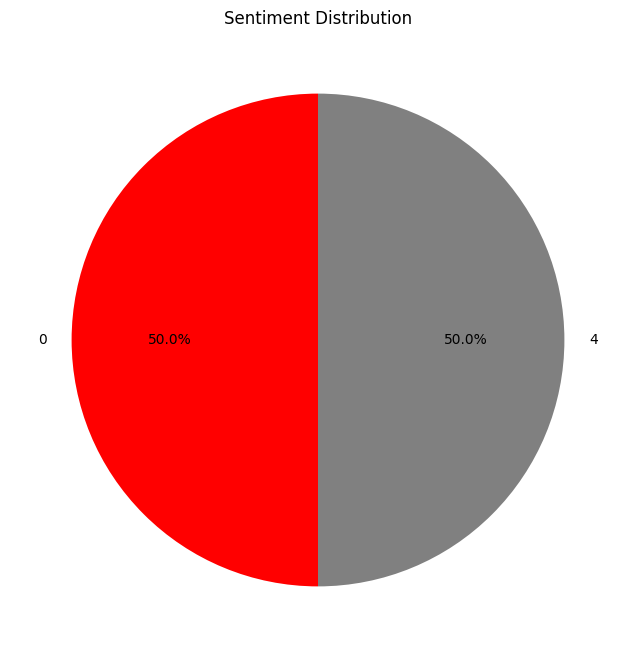

In [39]:

# Plot sentiment distribution in a pie plot
sentiment_counts = df[0].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=90, colors=['red', 'gray', 'green'])
plt.title('Sentiment Distribution')
plt.show()


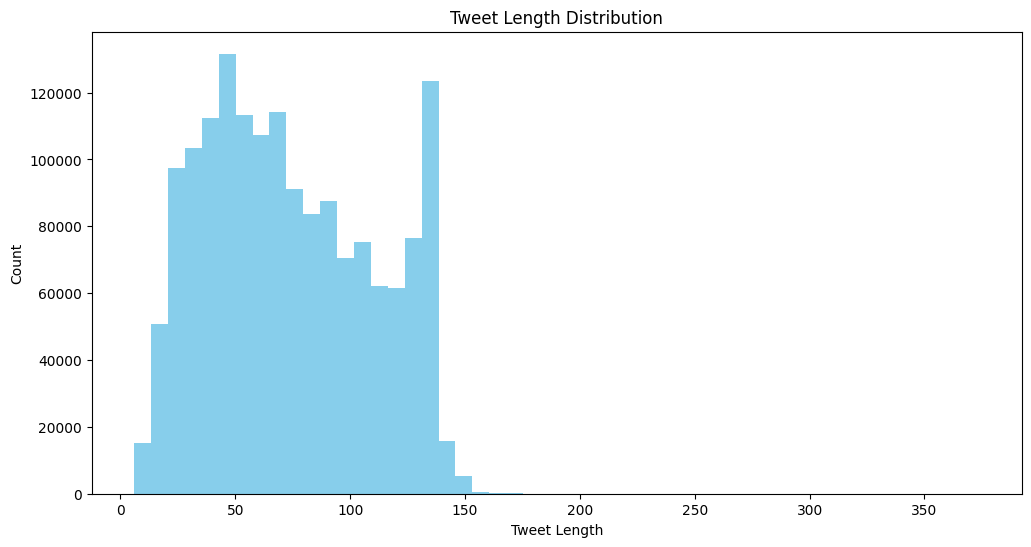

In [41]:

# Plot tweet length distribution with higher bins
plt.figure(figsize=(12, 6))
plt.hist(df[5].apply(len), bins=50, color='skyblue')
plt.title('Tweet Length Distribution')
plt.xlabel('Tweet Length')
plt.ylabel('Count')
plt.show()


/var/folders/y5/4ntn99k92d70gksjt9w9jgzr0000gn/T/ipykernel_36266/1773264316.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_tweets[2] = pd.to_datetime(negative_tweets[2].astype(str).str.replace('PDT', ''), errors='coerce').dt.tz_localize('UTC')
/var/folders/y5/4ntn99k92d70gksjt9w9jgzr0000gn/T/ipykernel_36266/1773264316.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  positive_tweets[2] = pd.to_datetime(positive_tweets[2].astype(str).str.replace('PDT', ''), errors='coerce').dt.tz_localize('

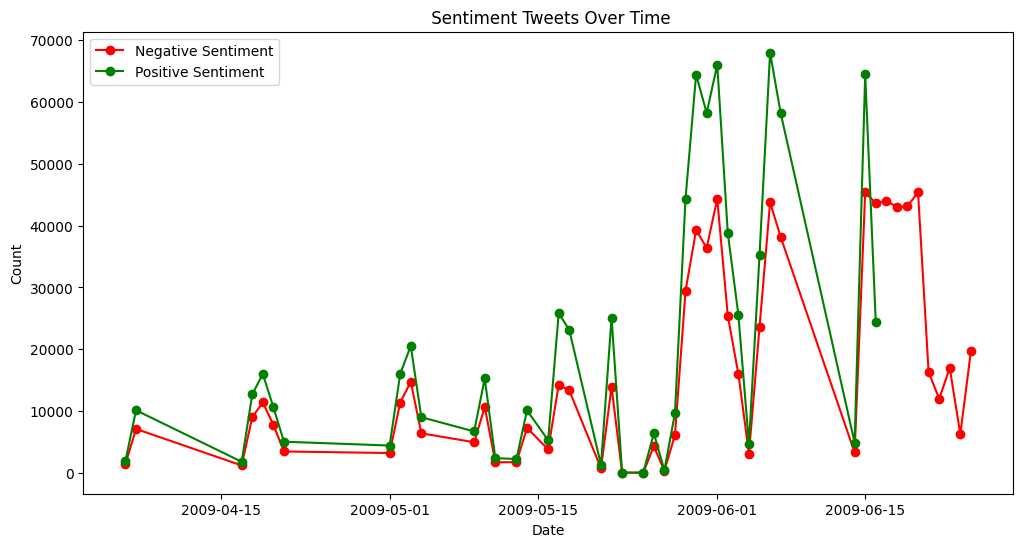

In [47]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame
# If not, replace df with your actual DataFrame

# Filter negative and positive sentiment tweets
negative_tweets = df[df[0] == 0]
positive_tweets = df[df[0] == 4]

# Convert date columns to datetime
negative_tweets[2] = pd.to_datetime(negative_tweets[2].astype(str).str.replace('PDT', ''), errors='coerce').dt.tz_localize('UTC')
positive_tweets[2] = pd.to_datetime(positive_tweets[2].astype(str).str.replace('PDT', ''), errors='coerce').dt.tz_localize('UTC')

# Plot negative sentiment tweets over time
plt.figure(figsize=(12, 6))
negative_tweets.groupby(negative_tweets[2].dt.date).size().plot(marker='o', linestyle='-', color='red', label='Negative Sentiment')
positive_tweets.groupby(positive_tweets[2].dt.date).size().plot(marker='o', linestyle='-', color='green', label='Positive Sentiment')
plt.title(' Sentiment Tweets Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.show()


In [43]:

num_unique_users = df[4].nunique()
print(f"Number of Unique User IDs: {num_unique_users}")

Number of Unique User IDs: 659775


### Information about the DataFrame:

The dataset contains **1,600,000** entries with **6** columns. Here's an explanation of each column:

1. **Column 0 (0):**
   - **Data Type:** int64
   - **Non-Null Count:** 1,600,000
   - This column appears to be of numeric type (`int64`) and has no missing values. It might represent some numerical information.

2. **Column 1 (1):**
   - **Data Type:** int64
   - **Non-Null Count:** 1,600,000
   - Similar to Column 0, this column is also of numeric type (`int64`) with no missing values.

3. **Column 2 (2):**
   - **Data Type:** object
   - **Non-Null Count:** 1,600,000
   - This column is of object type, typically indicating text or categorical data.

4. **Column 3 (3):**
   - **Data Type:** object
   - **Non-Null Count:** 1,600,000
   - Another object-type column, likely containing textual or categorical information.

5. **Column 4 (4):**
   - **Data Type:** object
   - **Non-Null Count:** 1,600,000
   - Similar to Columns 2 and 3, this column is of object type.

6. **Column 5 (5):**
   - **Data Type:** object
   - **Non-Null Count:** 1,600,000
   - The last column is also of object type, indicating text or categorical data.

The overall memory usage for the DataFrame is **73.2+ MB**.

This information provides an overview of the data types, non-null counts, and memory usage for each column in the DataFrame.


<style>
  table {
    font-family: Arial, sans-serif;
    border-collapse: collapse;
    width: 100%;
  }

  th, td {
    border: 1px solid #dddddd;
    text-align: left;
    padding: 8px;
  }

  th {
    background-color: #f2f2f2;
  }
</style>
</head>
<body>

<h2>References</h2>

<table>
  <tr>
    <th>Reference</th>
    <th>Link</th>
  </tr>
  <tr>
    <td>Reference 1</td>
    <td><a href="https://arxiv.org/pdf/1804.04406.pdf" target="_blank">https://arxiv.org/pdf/1804.04406.pdf</a></td>
  </tr>
  <!-- Add more rows for additional references if needed -->
</table>